In [2]:
%run evolution_file.py

In [3]:
def count_2413(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[l] < P[j] and P[l]>  P[i]:
                                C = C+1
    return C

In [4]:
def count_2413_random(permutation,s):
    P = permutation
    n = len(P)
    C = 0
    B4 = scipy.special.binom(n,4)
    for i in range(s):
        r = random.randint(0,B4-1)
        selection = unrank_binomial(n,4,r)
        RP = []
        i = 0
        while len(RP) < 4:
            if selection[i] == "1":
                RP = RP + [P[i]]
            i = i + 1
        if relative_order(RP) == [1,3,0,2]:
            C = C + 1
    return C

In [5]:
print(count_2413_random([3,9,4,6,1,2,0,8,5,7],210))
count_2413([3,9,4,6,1,2,0,8,5,7])

12


16

In [6]:
def Evolutionary_Algorithm_randomcrossover_randomfast_2413(n):
    #initialize population and compute fitness for each individual
    s = 10
    POP = []
    for j in range(15000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413_random(P,s)
        POP = POP + [[fitness/s,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<400001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,25)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413_random(child1,s)
        fitness2 = count_2413_random(child2,s)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1/s,child1]]
        POP = POP + [[fitness2/s,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:15000]
        if fe % 10000 == 0:
            print([fe,s,POP[j][0]*s],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
            s = s + 100
    return POP

[10000, 10, 0.0] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.0]


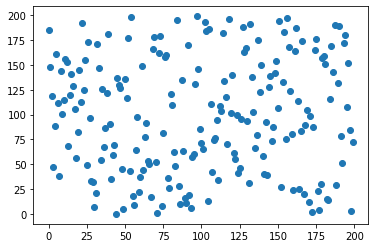

[20000, 110, 4.0] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.03636363636363636]


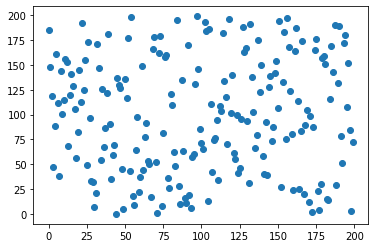

[30000, 210, 10.0] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.047619047619047616]


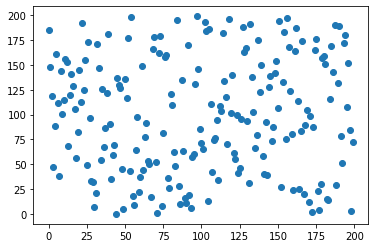

[40000, 310, 16.909090909090907] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05454545454545454]


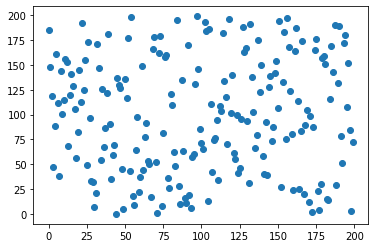

[50000, 410, 22.483870967741936] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.054838709677419356]


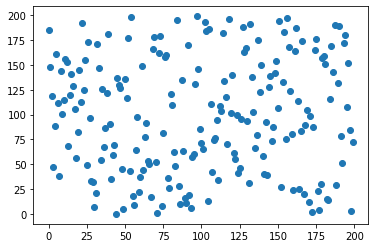

[60000, 510, 28.609756097560975] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05609756097560976]


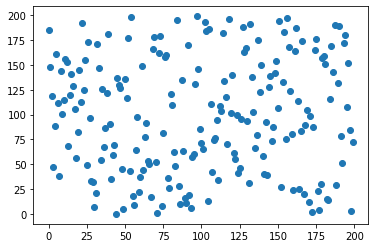

[70000, 610, 34.857142857142854] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05714285714285714]


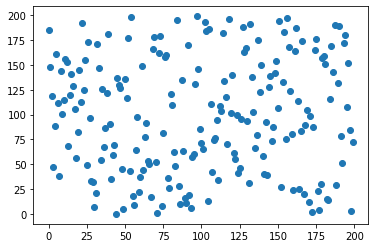

[80000, 710, 40.73770491803279] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05737704918032787]


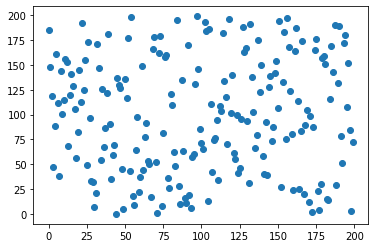

[90000, 810, 47.0] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05802469135802469]


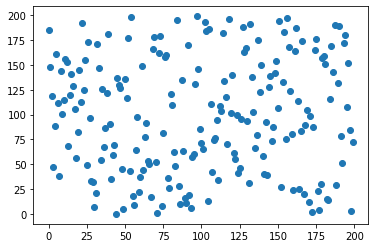

[100000, 910, 52.83870967741936] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05806451612903226]


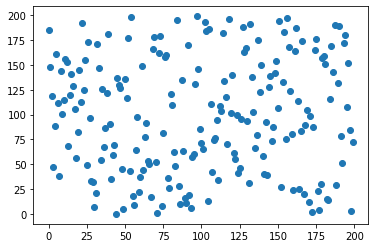

[110000, 1010, 58.645161290322584] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05806451612903226]


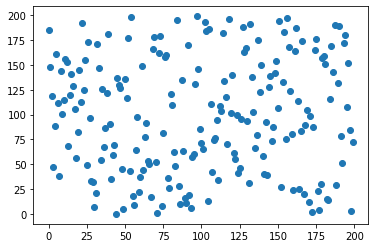

[120000, 1110, 64.84158415841584] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05841584158415842]


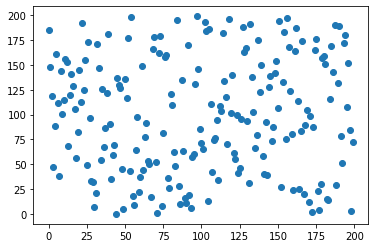

[130000, 1210, 70.82926829268293] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05853658536585366]


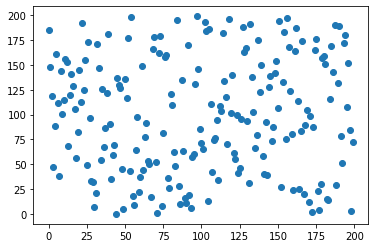

[140000, 1310, 76.6829268292683] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05853658536585366]


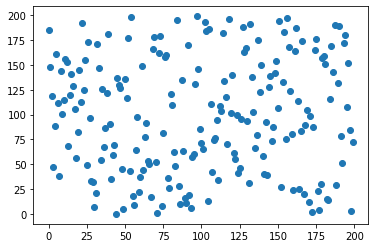

[150000, 1410, 82.53658536585367] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05853658536585366]


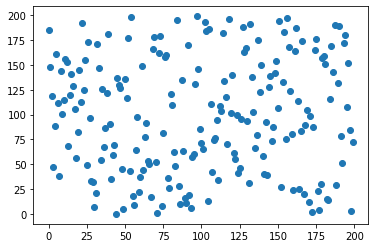

[160000, 1510, 88.42342342342342] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05855855855855856]


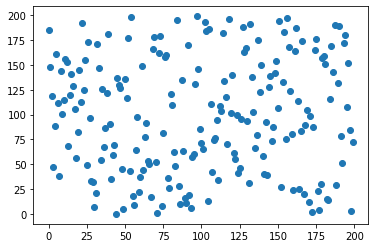

[170000, 1610, 94.47107438016529] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05867768595041322]


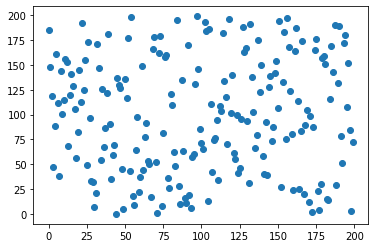

[180000, 1710, 100.51145038167938] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.05877862595419847]


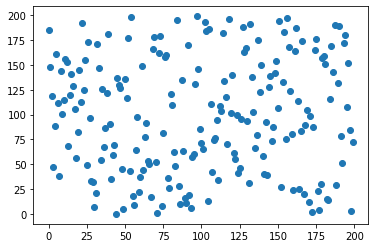

[190000, 1810, 106.47058823529412] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


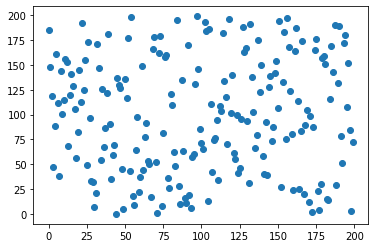

[200000, 1910, 112.35294117647058] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


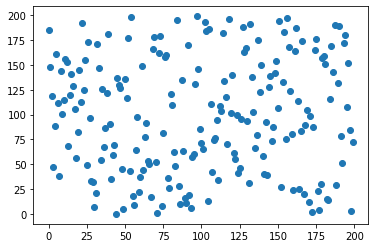

[210000, 2010, 118.23529411764706] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


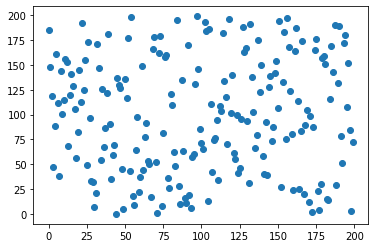

[220000, 2110, 124.11764705882352] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


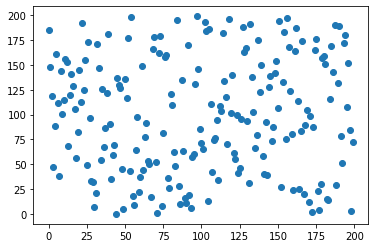

[230000, 2210, 130.0] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


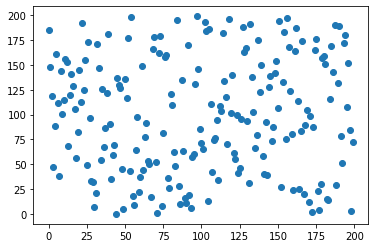

[240000, 2310, 135.88235294117646] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


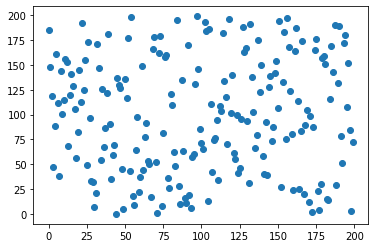

[250000, 2410, 141.76470588235293] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


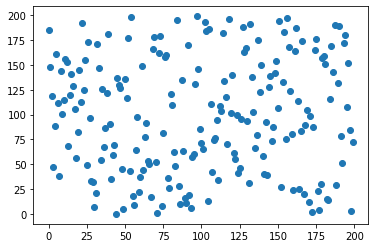

[260000, 2510, 147.64705882352942] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


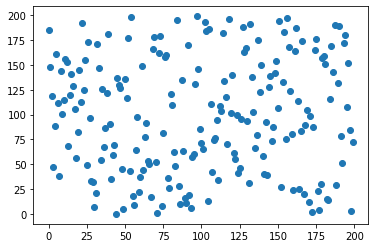

[270000, 2610, 153.52941176470588] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058823529411764705]


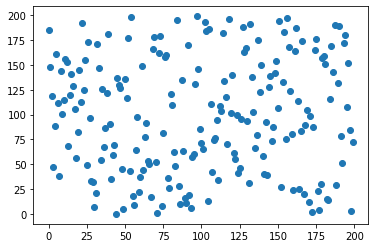

[280000, 2710, 159.52482269503545] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058865248226950356]


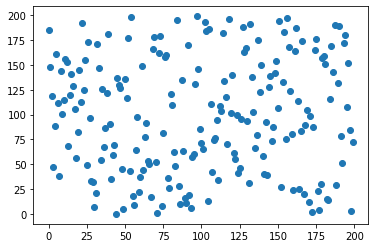

[290000, 2810, 165.4113475177305] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058865248226950356]


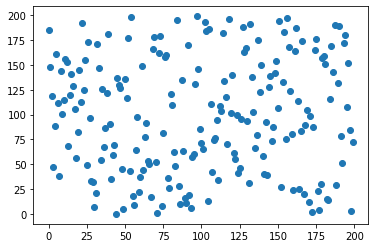

[300000, 2910, 171.29787234042553] [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4] [0.058865248226950356]


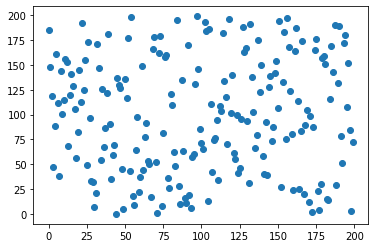

In [ ]:
Evolutionary_Algorithm_randomcrossover_randomfast_2413(200)